<a href="https://colab.research.google.com/github/cmarta22/Aprendizaje_Automatico/blob/main/Usuarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')


# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/usuarios_win_mac_lin.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [14]:
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Exploracion de los Datos

In [13]:
# Ver columnas y primeras filas
print(df.columns)
df.head()

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [22]:
# Variables independientes (features)
X = df.drop('clase', axis=1)

# Variable dependiente (target)
y = df['clase']

In [28]:
# Variables predictoras y objetivo
X = df[['duracion', 'paginas', 'acciones', 'valor']]  # todas numéricas
y = df['clase']  # variable objetivo con 0,1,2

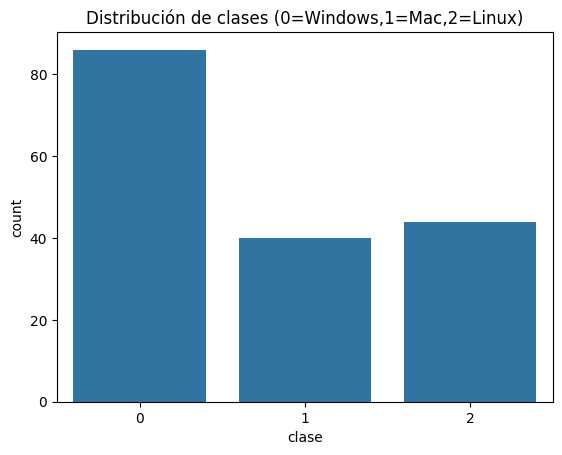

In [25]:
# Exploración de datos
sns.countplot(x=y)
plt.title("Distribución de clases (0=Windows,1=Mac,2=Linux)")
plt.show()

La barra 0 (Windows) está más alta hay más usuarios con Windows alrededor de 85.
La barra 1 (Mac) está más baja hay menos usuarios con Mac alrededor de 40.
La barra 2 (Linux) está un poco más alta que Mac hay un número intermedio de usuarios con Linux alrededor de 45.



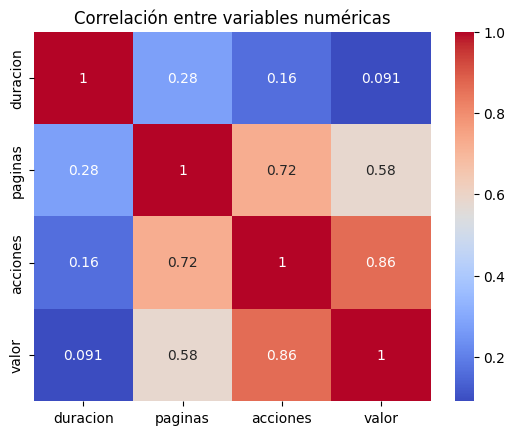

In [27]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables numéricas")
plt.show()

In [29]:
# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Evaluación
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       1.00      0.50      0.67         8
           2       0.64      1.00      0.78         9

    accuracy                           0.74        34
   macro avg       0.80      0.74      0.73        34
weighted avg       0.78      0.74      0.73        34



El modelo acierta en el 74% de los casos totales.

In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000,
                                  multi_class='multinomial',
                                  class_weight='balanced'))
])

In [35]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, target_names=['Windows', 'Mac', 'Linux']))

              precision    recall  f1-score   support

     Windows       0.75      0.71      0.73        17
         Mac       1.00      0.50      0.67         8
       Linux       0.64      1.00      0.78         9

    accuracy                           0.74        34
   macro avg       0.80      0.74      0.73        34
weighted avg       0.78      0.74      0.73        34



<Axes: xlabel='clase', ylabel='duracion'>

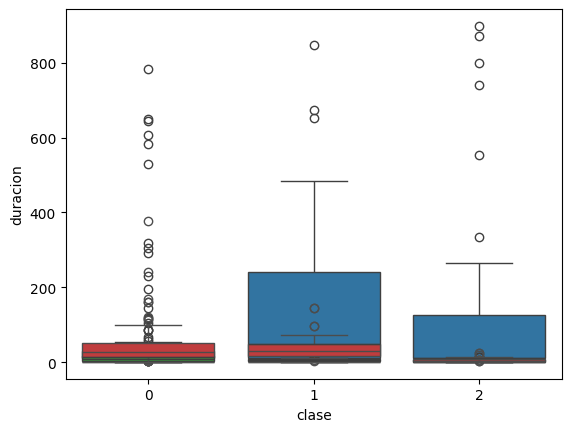

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots por clase
sns.boxplot(x='clase', y='duracion', data=df)
sns.boxplot(x='clase', y='paginas', data=df)
sns.boxplot(x='clase', y='acciones', data=df)
sns.boxplot(x='clase', y='valor', data=df)

Windows (clase 0): tiene una distribución más amplia y varios outliers con duraciones muy altas, esto sugiere que algunos usuarios de Windows tienen sesiones muy largas.

Mac (clase 1): muestra una mediana más baja y una distribución más compacta, las sesiones tienden a ser más cortas.

 Linux (clase 2): tiene una mediana intermedia, pero también presenta outliers. Esto podría reflejar un perfil más técnico o explorador.


In [37]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

# Coeficientes por clase
pd.DataFrame(modelo.coef_, columns=X_train.columns, index=['Windows', 'Mac', 'Linux'])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,duracion,paginas,acciones,valor
Windows,-0.004654,-0.277019,-0.681620,0.461091
Mac,-0.002153,0.013724,-0.981246,0.499613
Linux,0.006807,0.263295,1.662866,-0.960703


Los usuarios de Linux parecen ser muy activos (muchas acciones y páginas), pero sus acciones no están tan valoradas en el modelo.
 Los usuarios de Mac realizan menos acciones, pero esas acciones tienen alto valor.
 Los usuarios de Windows están en un punto intermedio, con menos acciones, pero acciones valiosas.

